In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

Shape of training input (RGB): (100, 64, 64, 3)
Shape of training target (Grayscale): (100, 64, 64, 1)

Training the model...
Model training complete.


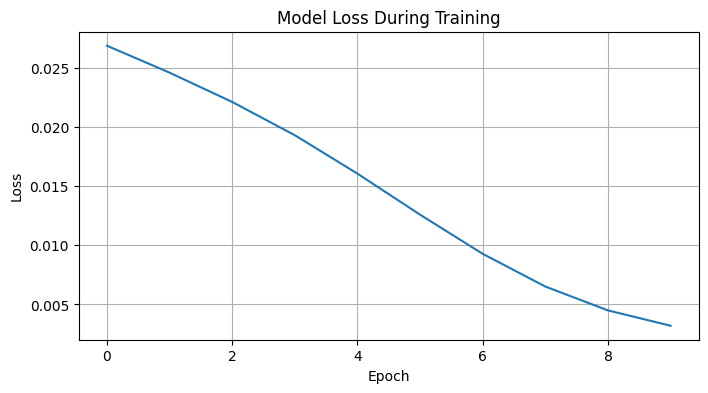

In [ ]:
# Generate some dummy RGB images (e.g., 100 images of 64x64 pixels)
x_train = np.random.rand(100, 64, 64, 3).astype(np.float32)

# Generate corresponding dummy grayscale images using a simple weighted average
# This serves as our 'ground truth' for training.
y_train = np.mean(x_train, axis=-1, keepdims=True) # Simple average for demonstration
# Or, for a more accurate luminance conversion:
# y_train = (0.2989 * x_train[:,:,:,0] + 0.5870 * x_train[:,:,:,1] + 0.1140 * x_train[:,:,:,2])[:,:,:,np.newaxis]


print(f"Shape of training input (RGB): {x_train.shape}")
print(f"Shape of training target (Grayscale): {y_train.shape}")

# Train the model
print("\nTraining the model...")
history = grayscale_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
print("Model training complete.")

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


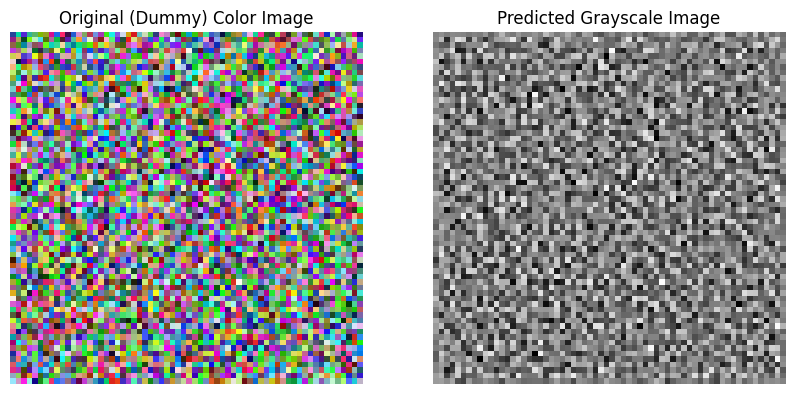

In [ ]:
# Generate a new random RGB image for prediction
color_image_to_convert = np.random.rand(1, 64, 64, 3).astype(np.float32)

# Predict the grayscale version
grayscale_output = grayscale_model.predict(color_image_to_convert)

# Squeeze the channel dimension for plotting if it's 1
grayscale_output_squeezed = np.squeeze(grayscale_output, axis=-1)

# Display the original (dummy) color image and the predicted grayscale image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(color_image_to_convert[0])
plt.title('Original (Dummy) Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_output_squeezed[0], cmap='gray')
plt.title('Predicted Grayscale Image')
plt.axis('off')

plt.show()